In [1]:
import warnings
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown , Math 

sns.set()
warnings.filterwarnings('ignore')

In [2]:
def printmd(string): display(Markdown(string))
def latex(out): printmd(f'{out}')  
def pr(string): printmd('***{}***'.format(string))

<h1> Softmax Regression </h2>

<h2>
  <p>
    <a href =   "https://github.com/daodavid" > 
         author: daodeiv (David Stankov) 
       <img src="https://cdn.thenewstack.io/media/2014/12/github-octocat.png" align="left" width="120"  alt="daodavid" ></a>
    </p>      
</h2>   

<h6>
  <font size="4" face = "Times New Roma" color='#3f134f' > 
    <ul style="margin-left: 30px">
      <li><a href='#abstract'>Abstract </a> </li> <br>
      <!--<li><a href='#int-1'>Introduction </a> </li><br> -->
      <li><a href='#deff_softmax'>Softmaxt definition and  how it works?</a> </li><br>
      <li><a href='#cross_entropy'>Cross-entropy Loss</a> </li><br>  
      <li><a href='#optimization'>Optimization of softmax by Cross-entropy Loss and derivation of Gradient descent formula </a> </li><br>
       <li><a href='#gradient'>Implementation of Gradient descent algorithm </a> </li><br> 
      <li><a href='#reg'>Regularization of gradient descent by learning rate and max iterations</a> </li><br>     
       <li><a href='#conclusion'>Conclusion</a> </li><br>  
        
</ul>    
 </font>
  </h6>
  

The Softmax function maybe is one of the most popular Machine learning algorithm basically, it turns arbitrary real values into probabilities, by using the exponential function. It could be considered a generalization of the sigmoid function. We could use softmax for multi-class classification furthermore it is met in many various fields of science as Statistical physics (Gibbs distributions), Quantum statistic, Information theory, and Neural networks. Softmax is much attractive in classification problems since it has a simple implementation and in many cases gives satisfying results and enough good performance.
     

We gonna use the Iris dataset because it is comparatively simple and  very convenient  in the studying Machine Learning. 


In [3]:
iris = pd.read_csv("../../../resources/data/IRIS.csv")  
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
pr('labels value : ' +str(iris['species'].unique()))

***labels value : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']***

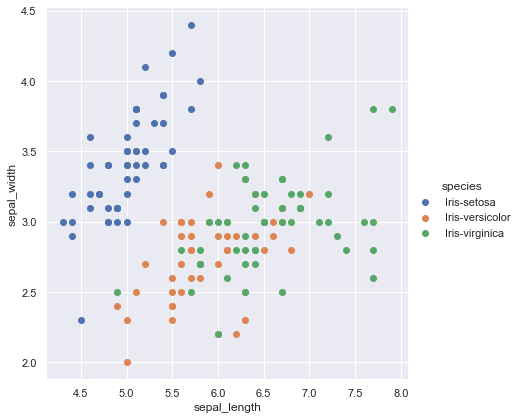

In [5]:
sns.FacetGrid(iris,hue='species',height=6).map(plt.scatter,'sepal_length','sepal_width').add_legend()


 We will express the label values as <mark> one-hot encoding </mark> variables or so-called dummies variables. equation.

In [6]:
x_train = iris.drop('species', axis=1)
y_train = pd.get_dummies(iris['species'])
pr('One hode encoding representation')
y_train.head()

***One hode encoding representation***

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [7]:
x_train, y_train = np.array(x_train), np.array(y_train)
pr('shape X :'+ str(x_train.shape))
pr('shape X :'+ str(y_train.shape))


***shape X :(150, 4)***

***shape X :(150, 3)***

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.33, random_state=42) #separats into test and train samples

<h2  id="deff_softmax" >Softmaxt definition and  how it works?</h2>


 The softmax function $\sigma: \; \Re^k \; \rightarrow \; \Re^k $  could be defined by formula :
   

$$ (1) \;\; \sigma_{softmax}({z^i})_{ij} =\frac {e^{z_{ij}} }{ \sum_i^k e^{z_{ik}} } $$ 



$\; \; z_{ij} = \sum_p x_{ip} w_{jp} + b_j $ 
 <br><br>
$\; \; \vec{z_i} = z^i= [z_{i1}, z_{i2}, ...z_{ik} ] $


 $$\sigma_{softmax (W,b,X^{i})_{ij}}=\frac{e^{ \sum_p x_{ip} w_{pj} + b_j}}{\sum_j^k e^{ \sum_p x_{ip} w_{pj} + b_j}} $$


###### Index convetions. When we note for example $Q_{lh}$ or $q_{ih}$ we will mean the element of matrix $Q_{M\times N}$ where $l$ refers to row $h$ to column. When we write $Q^{i}$  or  $q_{i}$ we  will assume that as vector row  $\vec Q^{i}= [q_{i1},q_{i2},...q_{in}]\in Q_{m\times n}$. In eq(1) $z^i=[z_{i1}, z_{i2}, ...z_{in}] $
</div>

 The softmax function  takes as an input a vector $z^i$ with $K$ number of component $z_{i1}, z_{i2}, ...,z_{in}$  and normalized it into  a  probability distribution $p^{i}$ consisting of also  $K$ number of probabilities  $p_{i1},...,{ik}$ proportional to exponentials of input values $z^{i}$. That is, prior to applying softmax function some vector components of $z^{i}$ could be negative or greater than 1 and  might not sum up to 1. Furthermore more the larger input components correspond to larger probabilities and $\sum_j p_{ij}=1$. The $w_{jp}$ are the wights or estimators  $w_{pj}\in W^{K\times N}$ In matrix  $W^{K\times N}$ $K$ coresponds to number of class labels and  $N$ coresponds to number of atrribute(feature) of training data, and $ b = [b_1, ...b_k]$ is bais term with component coresponds to class labels. 

This property of softmax function that it outputs a probability distribution makes it suitable for probabilistic interpretation in classification tasks.

According to our dataset, we can write the folowing expressions.

$W= \begin{bmatrix} 
      weight^1\rightarrow class \; 1(Iris-setosa)
      \\ weight^2\rightarrow class\;  2(Iris-versicolor) \;  
      \\ weight^{3}\rightarrow class \;3(Iris-virginica) \;
      \end{bmatrix} =
    \begin{bmatrix}
    \vec W^1 \\  \vec W^2\  \\ \vec W^3  \end{bmatrix} =
    \begin{bmatrix} 
    w_{11} & w_{12} & w_{13} & w_{14}
    \\ w_{21} & w_{22} & w_{23}  & w_{24}
    \\ w_{31} & w_{32} & w_{33} & w_{34}
    \end{bmatrix}  $ &nbsp;&nbsp;&nbsp;&nbsp;  $ B= \begin{bmatrix}  b_1 \\  b_2\  \\  b_3  \end{bmatrix}\;\;\;$

&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; vector $\vec W^i=[w_{i1},..w_{in}]$ is estimator vector for taget class (label) $i$ , $n$ coresponds to the feature (pridictor) of $X$ 


&nbsp;&nbsp;in matrix form the $Z$ is expressed as : $Z = XW^T$ 
 <br> <br>
 
  &nbsp;&nbsp;&nbsp;&nbsp;  $Z = 
    \begin{bmatrix} x_{11} &  x_{12} & x_{13}  & x_{14} \\  x_{21} &  x_{22} & x_{23}  & x_{24}\\ ... & ... & ... & ...\\ x_{m1} &  x_{m2} & x_{m3}  & x_{m4} \end{bmatrix} \times \begin{bmatrix}
    w_{11} & w_{21} & w_{31} 
    \\ w_{12} & w_{22} & w_{32} 
    \\  w_{13} & w_{23} & w_{33}
     \\  w_{14} & w_{24} & w_{34}
    \end{bmatrix} + \begin{bmatrix}  b_1 \\  b_2\  \\  b_3  \end{bmatrix}  =   \begin{bmatrix} z_{11} &  z_{12} & z_{13} \\  z_{21} &  z_{32} & z_{33} \\ ... & ... & ...  \\ z_{m1} &  z_{m2} & z_{m3}  \end{bmatrix} $ <br>   
   


&nbsp;&nbsp; The softmax function computes the probability that a training example $X^{(i)}$  belongs to class $y^{j}$ given 
    the weight  matrix $W$ and bias $\vec b$ . <br> 
    So we compute the probability : <br>

$$p_{ij}=P(y_{j} \;| \;z^i) = \sigma_{softmax (z)_{ij}}=\frac{e^{z_{ij}}}{\sum_p^K e^{z_{ip}}} $$



&nbsp;&nbsp; for all $P_{ij}$ and given target components  $Y = [y^1 -Iris-setosa,y^2 -Iris-versicolor,y^3- Iris-virginica]$ we can write :


 $$ P = \begin{bmatrix} p(y_{1} |z^{1})_{11} &  p(y_{2} |z_{2} )_{12}  &  p(y^{3}  |z^{3} )_{13} 
        \\ ... &  ...  & ...
        \\ P(y_{1} |z^{m}  )_{m1} &  P(y_{m}  |z^{m}  )_{m2}  & P(y_{3}  |z^{m} )_{m3}
        \end{bmatrix} = 
        \begin{bmatrix} \frac{e^{z_{11}}}{\sum_{1j}e^{z_{1j}}} & \frac{e^{z_{12}}}{\sum_{1j}e^{z_{1j}}} & \frac{e^{z_{13}}}{\sum_{1j}e^{z_{1j}}} 
        \\   \\ ... & ... & ...  \\
        \\    \frac{e^{k_{n1}}}{\sum_{j}^3e^{z_{nj}}} & \frac{e^{z_{n2}}}{\sum_{j}^3e^{z_{nj}}} & \frac{e^{z_{n3}}}{\sum_{j}^3e^{z_{nj}}}\end{bmatrix} $$

for example, the probability of record $x^1$ to belongs to target label  $y_2$ (Iris-versicolor) is calculated as:<br> <br> 

$$p_{12} =P(y=2 |x^{1}) = \frac{ e^{ ^{z_{12}} } }{ \sum_p^3 e^{z_{1p}}}=\frac{ e^{ (^{\sum_v^3 x_{1v}.w_{vj} + b_v }} )}{ \sum_k^3 e^{ ^ ({\sum_v^3 x_{1v}.w_{vk}} + b_k})}$$
always the $p_{ij} \in [0,1]$   and $\sum_j p_{ij}= 1$

 &nbsp; Let's see how the softmax function can be applied concretely in our training dataset.
             First, let to define a weight matrix $W$ and bias $\vec b$ <br> <br>


   &nbsp;&nbsp;    $W =\begin{bmatrix} 
    w_{11} & w_{12} & w_{13} & w_{14}
    \\ w_{21} & w_{22} & w_{23}  & w_{24}
    \\ w_{31} & w_{32} & w_{33} & w_{34}
    \end{bmatrix} 
    =  \begin{bmatrix} 1.38618464 &  1.9151765 & -0.28863154 & 0.40849489
              \\1.31642223 & 0.76753677 &  1.1482473 & 0.74274245
              \\0.29739313 & 0.31728673 & 2.14038423 &  1.84876265\end{bmatrix}$ <br> <br>
     &nbsp;&nbsp; $B = \begin{bmatrix}  1.18749764 \\ 1.16215506 \\0.6503473   \end{bmatrix}  $

       

 I've prepared weight vector $W$ and bias $B$ in advance, how? We will see later.


In [9]:
W = np.array([[ 1.38618464,  1.9151765 , -0.28863154,  0.40849489],
        [ 1.31642223,  0.76753677,  1.1482473 ,  0.74274245],
        [ 0.29739313,  0.31728673,  2.14038423,  1.84876265]]) # define a weight matrix

b = np.array([1.18749764, 1.16215506, 0.6503473 ])  #bias vector (intercept) 



 The implementation of softmax function:


In [10]:
def softmax(X, weight, b):
    '''
    perform softmax function
    
    Parameters :
    X : ndarray
       train data
    weight : ndarray
       weght matrix
    b : ndarray 
        bias vector        

    Returns 
       ndarray 
    '''
   
    #dot product between X_data matrix  and tranposed Weight_ matrix added to Bias  gives matrix each z_ij
    Z = X.dot(weight.T)

    #return matrix cosist of exponentials Z input net
    exp_z = np.exp(Z)

    #array contains sum  of every row  (e^z_{ik})
    sums=np.sum(exp_z, axis=1) 
    
    #return softmax(Z)_{ij}
    return (exp_z.T/sums).T 


def accuracy(Y, P):
    '''
    evualate accuracy of dummies variable
    
    Parameters :
    Y_target : ndarray
      actual real values 
    P : ndarray
     predicted values (probability)
    Return
      float
    '''
        
    C =  np.argmax(Y, axis=1)==np.argmax(P, axis=1)
    D = np.where(C==True)
    return len(D[0])/len(C)

In [11]:
pr( "original data label " +r'$ Y_{{M\times N}} :$'.format(X_test.shape))
actual_label = pd.DataFrame(y_train,columns = ['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
actual_label.head()

***original data label $ Y_{M\times N} :$***

,Iris-setosa,Iris-versicolor,Iris-virginica
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0
4,0,0,1


In [12]:
pr("predicted data label " +r'$ P_{{M\times N}} :$'.format(X_test.shape))
predict = softmax(X_train,W,b)
predict = pd.DataFrame(predict,columns = ['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
predict.head()

***predicted data label $ P_{M\times N} :$***

,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.050053,0.777979,0.171968
1,0.001113,0.555302,0.443584
2,0.030317,0.696057,0.273627
3,0.907907,0.091569,0.000524
4,0.000807,0.561198,0.437995


In [13]:
a =accuracy(np.array(y_train),np.array(predict))
pr('accuracy : '+str(a))

***accuracy : 0.75***

From $P_{{M\times N}}$ output let to consider the row with index  $1$ : <br> <br>
            $P'_{1,1} = 0.004 \rightarrow  $ has  $0$% chance that record $X^{1}$ belongs to class 1 'iris-setosa' <br> 
            $P'_{1,2} = 0.167 \rightarrow  $ has $17$% chance that record  $X^{1}$ belongs to class 2 'Iris-versicolor' <br> 
            $P'_{1,3} = 0.83 \rightarrow  $ has $83$% chance  belongs to class 3 'Iris-virginica'<br> 
            <br>
      From above result we can conclude : <br>
      We cannot be too sure which is the class label that record  $X_{1}$ belongs,but its third column has $80$% chance which is the biggest one therefore, we would assume that record belongs to class 'Iris-virginica'in fact, that is coorect assumtion comparing with actual data $Y$. By applying this evaluation process for all results we can validate that the weight matrix $W_{M \times N}$ and $b$ have given the $95$% accuracy.&nbsp;&nbsp; &nbsp;&nbsp; <br> <br> How have I  found the weight matrix $W$ and bias $B$ ? 
Just I've used the <mark>LogisticRegression</mark> from <mark>scikit-learn</mark> and took the coefficients, let us try to find out the way   of finding the weight $W$ and bias $b$ and is it posible to imporove estimators of $W$ and bias $b$.



       

<h2>Optimizaton of  Softmax Loss with Gradient Descent (Deep math) </h2>

For objective loss function we will use <mark>Cross-Entropy</mark> wich is used binary logistic reg.Sofmax Loss  is defined as :

   $$ (2)\;\; \mathcal{L}(Y,Z)=-\sum_i^m\sum_j^k y_{ij} \log (p(Z)_{ij})$$ <br> <br>  

  &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    Where $m$ is a count of records , $k$ is  count of classes $y_{ij}$ is label values , $p_{ij}=\phi_{softmax}(Z)_{ij}$ are  Y' predicited class  values and $Z$ is net input which is function of $W$ is weight matrix and $b$ bias and $X$


Our goal is to minimize the eq.(2) in order to find the best estimators $w_{ij}\in W$ and $b$ given the iris data $X$ and a label data $Y$. <br>
We are going to use Gradient descent for optimization process. 
Note that, the eq.(2) is the function of all weights $w_{ij}$, bias $b_j$ all training data X and label data Y.

&nbsp;&nbsp;  Gradient descent is defined as  : 
<br>    
$$ \;  \; \;  \; \; \; \;\begin{matrix} w_{ij} = w_{ij} - \lambda \nabla w_{ij}L(W,b,X,Y) \\  \\ b_{j} = b_j - \lambda\nabla b_{j}L(W,b,X,Y)
       \end{matrix} $$ 
&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
where  $\lambda$ is learning rate or step size 
   
   


&nbsp;&nbsp; Plug eq.(2) in gradient descent we achieve the general formula : <br> <br>
     $$(3) \;  \; \;  \; \; \; 
   \begin{matrix} \nabla w_{ij}L(Y,P)   &=  \nabla w_{ij}L(Y,P) -\frac{\partial}{\partial w_{ij}}\Big(\sum_k^m\sum_n^n y_{mn} \log {p_{mn}}\Big) \\  \\
     \nabla b_{j}L(Y,P) & = \nabla b_{j}L(Y,P)  - \frac{\partial}{\partial b_{j}}\Big(\sum_k^m\sum_n^n y_{mn} \log{p_{mn}}\Big)
       \end{matrix} $$

Before we take up  with  $\nabla w_{ij}L(W,b)$. We gonna introduce some math technics which will make our work easier.
   <br>
   For simplicity in the summation process of indices, we will introduce a <a href='http://physics.csusb.edu/~prenteln/notes/vc_notes.pdf'>Kronecker symbol</a> .<br>   <br>
</font>
<font size="3" color='#4a3e20' >  
       $$\delta_{ij} =    
         \begin{equation}
   \begin{Bmatrix} 
   1 & if \; i=j  \\
   0 & if \; i\ne j  
    \end{Bmatrix} 
\end{equation}$$
  <br><br>
          $$ \delta_{ij} = \begin{bmatrix} 1 & 0 & 0  \\ 0 & 1 & 0 \\  0 & 0 & 1 \end{bmatrix}$$
   </font>
<font size="3" color='#270336' face = "Times New Roma">  
   In many places in the coming sum operations over indexes we will miss the $\sum$ symbol, just it will be avoided(hidden) according to the .<a href='https://en.wikipedia.org/wiki/Einstein_notation'>Einstein summation convention</a> .<br>
       For example, the equation. 
</font>


​
<h7>
    <font size="2" color='#270336'>  
   $$z_{ij} = \sum_p^3 x_{ip} w_{jp} + b_j $$ 
</font>
<font size="3" color='#270336' face = "Times New Roma">  
     by applying the  Enstein convetion we could rewrite it as : <br>
</font>
</h7>


 $$z_{ij} = x_{ip} w_{jp} + b_j$$  
The sign $\sum_p^3$ is miss.The sumation over p  is implied(by default) because p is repeated twice.Every time when there are repeatable indices that is the indicator for exist of $\sum$  which is just missing(The sum sign  is not written).

​


  &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;In order to minimize the entropy of data, we must to take up with minimizatin of Cross entropy loss respect to $w_{ij}$.The cross-etropy Loss is a function of all feature vectors $X_{M\times N}$ ,all labels $X_{M\times K}$ , weight $W_{K\times N}$ and bias $B_K$ <br> $L = L(X,T,W,B)$

&nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$\frac{\partial L}{\partial w_{ij}}=-\frac{\partial}{\partial w_{ij}}\Big(\sum_k\sum_n y_{mn} \log {p_{mn}}\Big)$
 $=\sum_k\sum_n y_{mn}\frac{\partial \log {p_{mn}}}{\partial w_{ij}}$ 
    

 
 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$=-\sum_m\sum_n\frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial w_{ij}} $ 
            $=\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial z_{vp}}\frac{\partial  z_{vp}}{\partial w_{ij}} $


<h6> from  $z_{vp} = f(w_{pi}) \Rightarrow \frac{\partial  z_{vp}}{\partial w_{ij}} = 0\;$ if $\; p\ne i$ then  we can  write $ \frac{\partial  z_{vp}}{\partial w_{ij}}=\delta_{pi}\frac{\partial  z_{vp}}{\partial w_{ij}}$ 
      and  $p_{mn} = f(z_{mv}) \Rightarrow \frac{\partial  z_{vp}}{\partial w_{ij}} = 0$ if $ m\ne v $ then   $\frac{\partial p_{mn}}{\partial z_{vp}}=\delta_{mv}\frac{\partial  p_{mn}}{\partial z_{vp}}  $ 
   plug in it  we will achieve </h6>


 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$ =-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\delta_{mv}\frac{\partial  p_{mn}}{\partial  z_{vp}} \delta_{pi}\frac{\partial  z_{vp}}{\partial w_{ij}} $


<h6>using common Kronicker $\delta$ proprties </h6> <br> 
 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$=-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\delta_{mm}\delta_{ii}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}} $ $=-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}} $ 


We've successfully reduced the count of sum operations, using Einstein's convention and Kronecker symbol and
    achieved

&nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$\frac{\partial L}{\partial w_{ij}}=-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}}$ 

  Let to focus on terms $\frac{\partial  p_{mn}}{\partial z_{mi}}$ and $\frac{\partial  z_{mi}}{\partial w_{ij}}$

   $\frac{\partial  p_{mn}} {\partial z_{mi}}=\frac{\partial\frac { e^{z_{mn}} }{ \sum_ke^{z_{mk}}} }{\partial z_{mi}}$
     $=\frac{1}{(\sum_ke^{z_{mk}})^2}\times \Big(\frac{\partial e^{z_{mn}} }{\partial z_{mi}}\times(\sum_ke^{z_{mk}}) - e^{z_{mn}}\times\frac{\partial (\sum_ke^{z_{mk}})}{\partial z_{mi}}  \Big)$

  $=\frac{e^{z_{mn}}\times\frac{\partial z_{mn}}{\partial z_{mi}}}{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mk}} \frac{ \partial z_{mk}}{\partial z_{mi}}}  {\sum_ke^{z_{mk}}}$

<h6> from  $\frac{\partial z_{mk}}{\partial z_{mi}}=0$ if $k\ne i\;\frac{\partial z_{mk}}{\partial z_{mi}}=1\;ifk = i\;\Rightarrow \frac{\partial z_{mk}}{\partial z_{mi}}=\delta_{ki} $ plug in </h6>

 $=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mk}}\delta_{ki}}  {\sum_ke^{z_{mk}}}$ 
      $=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_k e^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mk}}\delta_{ki}}  {\sum_ke^{z_{mk}}}$ 

  $=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mi}}\delta_{ii}}  {\sum_ke^{z_{mk}}}$ 
          $=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times \frac{ e^{z_{mi}}}{\sum_ke^{z_{mk}}}$ 

<h6>from eq.(1)  $\Rightarrow$ $\frac{ e^{z_{mn}} }{ \sum_k e^{z_{mk} } }=p_{mn}$ and $\frac{ e^{z_{mi}} }{ \sum_k e^{z_{mk} } }=p_{mi}$  when we apply it, we will achieve </h6>

 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
       $=p_{mn}\times \delta_{ni} - p_{mn}\times p_{mn}p_{mi}$ <br>
        &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
          $=p_{mn}(\delta_{ni} -  p_{mi})$ 

 For term  $\frac{\partial  p_{mn}} {\partial z_{mi}}$ we achieve : <br>
  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $$4) \; \; \; \; \frac{\partial  p_{mn}} {\partial z_{mi}}=p_{mn}(\delta_{ni} -  p_{mi})$$

 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $\frac{\partial  z_{mi}}{\partial w_{ij}} =\frac{\partial ( \sum_k  x_{mk}w_{ki})}{\partial w_{ij}}= \frac{ \sum_k z_{mi} x_{mk}\partial w_{ki}}{\partial w_{ij}}$ 

<h6>  $\frac{\partial w_{ki}}{\partial w_{ij}} = \delta_{kj}$ only a direct verification can  proof it </h6>

&nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $=  \sum_k  x_{mk} \delta_{kj} =\sum_k  x_{mj}\delta_{jj}=x_{mj}$  

<h6> and for $\frac{\partial  z_{mi}}{\partial w_{ij}}$ we achive : </h6>
      $$(5) \;\;\;\;\;\frac{\partial  z_{mi}}{\partial w_{ij}} = x_{mj} $$   


<h6>  &nbsp;&nbsp;
     Applying  eqs.(4) (5) in : $\frac{\partial L}{\partial w_{ij}}=-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}}$   we have  : </h6>

 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$\frac{\partial L}{\partial w_{ij}}=-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}p_{mn}(\delta_{ni} -  p_{mi})x_{mj}=--\sum_m\sum_n y_{mn}(\delta_{ni} -  p_{mi})x_{mj} $ 

 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $ =-\sum_m\sum_n y_{mn}\delta_{ni} + \sum_m\sum_n y_{mn} p_{mi}x_{mj} $ 
<h6> we can  replace an index $n$ with $i$ (!There is no $\sum_i$)  </h6>

  $ =-\sum_m\sum_n y_{mi}\delta_{ii}x_{mj} + \sum_m\sum_n y_{mn} p_{mi}x_{mj} $ 

 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
   $ =-\sum_m y_{mi}x_{mj} + \sum_m\sum_n y_{mn} p_{mi}x_{mj} $ <br>
 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
      $\sum_n y_{in}=1$ <h6> (the sum of all probability) applying it </h6>

 $ =-\sum_m y_{mi}x_{mj} + \sum_m 1. p_{mi}x_{mj} = \sum_m  p_{mi}x_{mj}-\sum_m y_{mi}x_{mj}$ <br> <br>
  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
  $ = \sum_k^m( p_{mi}-y_{mi})x_{mj}$

We've achieved the most important result .The optimization  of Cross-entropy respect to $w_{ij}$  :

 $$6) \;\;\;\;\nabla w_{ij}L(W,b)= \sum_m( p_{mi}-y_{mi})x_{mj}$$

 If we apply  the same   step for $\nabla b_{i}L(W,b)$ (It is an easier one)  we will achieve the minimization formula for bias , which looks like this<br><br>
      $$7)\;\;\;\;\nabla b_{i}L(W,b)= \sum_m( p_{mi}-y_{mi})$$


Although the eq.(6) seems so simple and elegant it is written in a tensor form, not in matrix one. Therefore its implementation becomes more difficult, especially when we want to use our lovely library NumPy.But we can write the equation in matrix form seeming like that :

 $\nabla_W L = \begin{bmatrix}
               \nabla_{w_{11}} L  & \nabla_{w_{12}}L &... &\nabla_{ w_{1j}}L \\
               \nabla_{ w_{21}}L & \nabla_{ w_{22}}L  &... &\nabla_{ w_{2j}}L \\
                ...   &  ...  & ... & ...  \\
                \nabla_{ w_{i1}}L  & \nabla_{ w_{i2}}L  & ...& \nabla_{ w_{ij}}L \end{bmatrix} $
$  =\begin{bmatrix}
p_{11} -y_{11}  &  p_{21}-y_{21}  & ... &  p_{m1}-y_{m1}\\
p_{12} -y_{12}  &  p_{22}-y_{22}  & ... &  p_{m2}-y_{m2}\\
\;\;...\;\;\;   &  \;\;...\;\;\;  &\;\;...\;\;\; &\;\;...\;\;\; \\
p_{1i} -y_{1i}  &  p_{2i}-y_{2i}  & ... &  p_{mi}-y_{mi}
 \end{bmatrix}$
$\begin{bmatrix} x_{11} &  x_{12} &...&  x_{1j} \\  x_{21} &  x_{22}  &...&  x_{2j}  \\ ... & ... & ... &... \\ x_{m1} &  x_{m2} &...&  x_{mj}\end{bmatrix}$

$$8)\;\;\;\;\nabla_W L = (P-Y)^T.X$$ <br>
$$\;\;\;\;\nabla_{b_i} L = \sum_m (P-Y)_{mi}\;\;\; or $$ or <br> <br>
 $$9)\;\;\;\;\nabla_{b} L =\Big[\sum_m (P-Y)_{m1}, \sum_m (P-Y)_{m2},..., \sum_m (P-Y)_{mi}\Big]$$ <br>

 We've  written eq(6) and(7) in matrix form, and  result is surprisingly simple and  so easy for implementation.If we plug the eq(8) and (9) in gradient descent eqaution <br> 
 $$ \;  \; \;  \; \; \; \;\begin{matrix} w_{ij} = w_{ij} - \lambda \nabla w_{ij}L(W,b) \\  \\ b_{j} = b_j - \lambda\nabla b_{j}L(W,b)
       \end{matrix} $$ 

 We've achieve our minimization alogithm for Cross-entopy Loss for find the best esitmitators $W_{ij}$.
    The minimization alogorithm using gradient descent is deifined as :  

 $$(10) \;  \; \;  \; \; \; \;  W= W -\lambda(P-Y)^T.X  $$
  <br>
    $$(11) \;  \; \;  \; \; \; \;  b_i = b_i -\lambda \sum_m(P-Y)_{mi}   $$


where W is a weight matrix , $\lambda$ is an leraning rate or step size, P is the the prediction values pruduced from sofmax   $Y$ is the target values $X$ is the training data (features vectors).

<h2> Implementation of Softmax using numpy </h2>

   &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;The implentation  using <mark color='blue' size='5'>numpy</mark>
     could be defined as : <br> <br>:

  $$ W = W - gamma*(( softmax(W,b,X,Y) -Y )^T).dot(X)$$ <br>
      $$ b_i = b_i - gamma*sum_m((softmax(W,b,X,Y)_i -Y_i)) $$


where the arguments are considered: the W matrix our estimator coeficients , $gamma=$ $\lambda* (1/m)$  step size,
     $\lambda$ learning rate $Y$ is the target values $X$ is the training data (features vectors).
 The implementation of gradient descent <br>


In [30]:
def gradient_descent(X, y, W, b, step_size):
    ''''
    one iteration(Epoch) perform  gradient descent
    
     Parameters :
    X : ndarray
       train data
    y : ndarray
       target data
    W : ndarray
     weight matrix
    b : ndarray
      bias 
    step_size : float
       gradient descent setting
    
    '''
    P_y = softmax(X,W,b)-y
    W = W - step_size*(P_y.T).dot(X)
    b = b - step_size*np.sum(P_y, axis=0)
    return W,b
    

def train(X , y, max_iter=100,learning_rate=0.1,innitial_value =1, debug_W=None):
    '''
    Train by softmax regression 
    
    Parameters :
    X : ndarray
       train data
    y : ndarray
       target data
    max_iter : int 
        number of epoch (iterations)
        
    debug_W : tuple 
       index of weight parameter for debugging
    Returns 
       W, b : ndarray
         weight and bias
       in debug mode
       W, b, k : ndarray
          weight and bias and debugind parameter 
         
       
    '''
    
    if type(X) != np.ndarray or type(y) != np.ndarray: 
        raise ValueError('X and y must be ndarray')
        
    #init weight and bias
    b = np.full((y.shape[1],),innitial_value)
    W = np.full((y.shape[1], X.shape[1]), innitial_value)
    
    m = X.shape[0] 
    step_size = (1/m)*learning_rate
    
    if debug_W is not None: 
        debug_mode=True 
        debug = W[(debug_W)]
    else :
        debug_mode=False
        
    for i in range(max_iter):
        W,b = gradient_descent(X , y, W, b,step_size)
        if debug_mode: debug = np.append(debug, W[debug_W])   
    
    
    if debug_mode: return W,b,debug
        
    return W,b

 Let to test our implementation and to train the iris data  <br> 
 Trainig data<br>


In [31]:
W,b = train(np.array(X_train), np.array(y_train),max_iter=100)   

In [32]:
print('weight vector :'+ str(W))
print('')
print('bias :'+ str(b))

weight vector :[[ 1.35411091  1.84190926 -0.19105989  0.45297526]
 [ 1.27780858  0.77747064  1.17029213  0.79586893]
 [ 0.36808051  0.3806201   2.02076776  1.75115581]]

bias :[1.17282574 1.13488628 0.69228799]


In [33]:
predict = softmax(np.array(X_test), W,b)
#print(v)
pr('accuracy:  ' +str(accuracy(np.array(y_test), predict))+'%')

***accuracy:  0.7%***

 We've  achieved  96% acuracy , learning rata = 0,1 max iteration 220<br>


Testing  on  data X_test and  y_test <br>
